哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
A = pd.read_csv(r'D:\Day100 learning\dataset\A_lvr_land_A.csv')
B = pd.read_csv(r'D:\Day100 learning\dataset\B_lvr_land_A.csv')
E = pd.read_csv(r'D:\Day100 learning\dataset\E_lvr_land_A.csv')
F = pd.read_csv(r'D:\Day100 learning\dataset\F_lvr_land_A.csv')

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.



In [17]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
a_data = A.drop(index=[0])
b_data = B.drop(index=[0])
e_data = C.drop(index=[0])
f_data = D.drop(index=[0])
d_data.head()

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
1,板橋區,房地(土地+建物),新北市板橋區南雅東路1~30號,9.76,商,NaN,NaN,1090405,土地2建物1車位0,六層,...,125589,NaN,0.0,0,含增建或未登記建物。;,RPQNMLMKNHPFFAF08CA,47.45,0.0,8.10,NaN
2,板橋區,房地(土地+建物)+車位,新北市板橋區縣民大道三段270巷1~30號,24.18,工,NaN,NaN,1090401,土地1建物1車位1,八層,...,113039,坡道平面,38.09,0,含增建或未登記建物。;,RPRNMLMKNHPFFAF18CA,116.29,0.0,11.80,NaN
3,板橋區,房地(土地+建物),新北市板橋區南雅南路一段1~30號,3.2,商,NaN,NaN,1090316,土地1建物1車位0,十一層,...,99489,NaN,0.0,0,含增建或未登記建物。;,RPTNMLMKNHPFFAF38CA,23.02,0.0,4.94,NaN
4,板橋區,房地(土地+建物),新北市板橋區金門街103巷1~30號,32.58,住,NaN,NaN,1090410,土地2建物1車位0,二層,...,88944,NaN,0.0,0,含增建或未登記建物。;,RPSNMLNKNHPFFAF38CA,80.55,0.0,16.14,NaN
5,板橋區,房地(土地+建物),新北市板橋區金華街10巷31~60號,87.0,住,NaN,NaN,1090330,土地1建物1車位0,全,...,145887,NaN,0.0,0,親友間買賣; 含增建部分,RPXNMLNKNHPFFAF88CA,89.11,0.0,0.00,NaN


In [23]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
a_data['city'] = 'Taipei'
b_data['city'] = 'Taichung'
e_data['city'] = 'Kaohsiung'
f_data['city'] = 'New_Taipei'
f_data

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
1,板橋區,房地(土地+建物),新北市板橋區南雅東路1~30號,9.76,商,NaN,NaN,1090405,土地2建物1車位0,六層,...,NaN,0.0,0,含增建或未登記建物。;,RPQNMLMKNHPFFAF08CA,47.45,0.00,8.10,NaN,New_Taipei
2,板橋區,房地(土地+建物)+車位,新北市板橋區縣民大道三段270巷1~30號,24.18,工,NaN,NaN,1090401,土地1建物1車位1,八層,...,坡道平面,38.09,0,含增建或未登記建物。;,RPRNMLMKNHPFFAF18CA,116.29,0.00,11.80,NaN,New_Taipei
3,板橋區,房地(土地+建物),新北市板橋區南雅南路一段1~30號,3.2,商,NaN,NaN,1090316,土地1建物1車位0,十一層,...,NaN,0.0,0,含增建或未登記建物。;,RPTNMLMKNHPFFAF38CA,23.02,0.00,4.94,NaN,New_Taipei
4,板橋區,房地(土地+建物),新北市板橋區金門街103巷1~30號,32.58,住,NaN,NaN,1090410,土地2建物1車位0,二層,...,NaN,0.0,0,含增建或未登記建物。;,RPSNMLNKNHPFFAF38CA,80.55,0.00,16.14,NaN,New_Taipei
5,板橋區,房地(土地+建物),新北市板橋區金華街10巷31~60號,87.0,住,NaN,NaN,1090330,土地1建物1車位0,全,...,NaN,0.0,0,親友間買賣; 含增建部分,RPXNMLNKNHPFFAF88CA,89.11,0.00,0.00,NaN,New_Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19814,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080817,土地2建物1車位1,十三層,...,坡道平面,30.31,1100000,預售屋、或土地及建物分次登記案件;,RPXNMLOJRHPFFIF57DA,73.39,2.65,8.52,有,New_Taipei
19815,三峽區,土地,成福段成福小段331~360地號,762,NaN,山坡地保育區,農牧用地,1090814,土地2建物0車位0,NaN,...,NaN,0,0,親友、員工、共有人或其他特殊關係間之交易;,RPQNMLRLQHPFFIF27DA,0.00,0.00,0.00,無,New_Taipei
19816,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080831,土地2建物1車位1,四層,...,坡道平面,30.31,1400000,預售屋、或土地及建物分次登記案件;,RPSPMLLLQHPFFIF07DA,73.40,2.64,8.52,有,New_Taipei
19817,鶯歌區,房地(土地+建物)+車位,中山路301~330號,19.85,其他,NaN,NaN,1090809,土地1建物1車位1,七層,...,坡道平面,24.14,0,NaN,RPUOMLRKQHPFFIF67DA,51.72,0.00,5.40,有,New_Taipei


In [25]:
#4. 將以上四份資料運用pd.concat()串接
data = pd.concat([a_data,b_data,e_data,f_data],axis = 0)
data

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19814,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080817,土地2建物1車位1,十三層,...,坡道平面,30.31,1100000,預售屋、或土地及建物分次登記案件;,RPXNMLOJRHPFFIF57DA,73.39,2.65,8.52,有,New_Taipei
19815,三峽區,土地,成福段成福小段331~360地號,762,NaN,山坡地保育區,農牧用地,1090814,土地2建物0車位0,NaN,...,NaN,0,0,親友、員工、共有人或其他特殊關係間之交易;,RPQNMLRLQHPFFIF27DA,0.00,0.00,0.00,無,New_Taipei
19816,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080831,土地2建物1車位1,四層,...,坡道平面,30.31,1400000,預售屋、或土地及建物分次登記案件;,RPSPMLLLQHPFFIF07DA,73.40,2.64,8.52,有,New_Taipei
19817,鶯歌區,房地(土地+建物)+車位,中山路301~330號,19.85,其他,NaN,NaN,1090809,土地1建物1車位1,七層,...,坡道平面,24.14,0,NaN,RPUOMLRKQHPFFIF67DA,51.72,0.00,5.40,有,New_Taipei


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [27]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [38]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
data = data.rename(columns = columns_mapping)
data.head()

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei


In [117]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
data_home = data[(data["main_use"]=='住家用') & (data["use_zoning"]=='住')]
data_home = data_home[analysis_columns]
data_home = data_home.dropna()

In [118]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
data_home = data_home.astype(columns_type)
data_home.head()

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
1,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2
2,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1
5,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2
7,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2
8,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2


In [120]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引
data_home['tx_dt_year'] = data_home['tx_dt'].apply(lambda x: x.split(" ")[0][0:3]).astype(int)
data_home = data_home[data_home['tx_dt_year']>=109]
data_home = data_home[(data_home['room_number']>=1)&(data_home['room_number']<=5)]
data_home = data_home[(data_home['hall_number']>=1)&(data_home['hall_number']<=1)]
data_home = data_home.reset_index().drop(columns ='index')
data_home

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
1,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
2,Taipei,萬華區,住家用,住,4000000,38.04,30.16,1090422,105152.0,3,1,2,109
3,Taipei,中正區,住家用,住,32880000,153.32,64.98,1090415,232106.0,2,1,2,109
4,Taipei,文山區,住家用,住,10000000,81.37,38.37,1090226,122895.0,3,1,2,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,New_Taipei,中和區,住家用,住,7500000,71.75,71.75,1090526,104530.0,2,1,2,109
1422,New_Taipei,樹林區,住家用,住,8050000,98.59,62.86,1090507,81651.0,3,1,2,109
1423,New_Taipei,淡水區,住家用,住,7250000,121.92,50.30,1090528,59465.0,2,1,1,109
1424,New_Taipei,汐止區,住家用,住,6350000,57.20,57.20,1090528,111014.0,3,1,1,109


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [124]:
data_home_feature = data_home.copy()
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
data_home_feature['building_area_square_feet']=data_home_feature['building_area_square_meter']*.3025
data_home_feature['main_building_area_square_feet'] = data_home_feature['main_building_area']*.3025
data_home_feature['unit_price_square_feet'] = data_home_feature['unit_price'] *.3025
data_home_feature.head()

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109,11.286275,7.435450,45241.2950
1,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109,37.585625,27.460950,19476.7650
2,Taipei,萬華區,住家用,住,4000000,38.04,30.16,1090422,105152.0,3,1,2,109,11.507100,9.123400,31808.4800
3,Taipei,中正區,住家用,住,32880000,153.32,64.98,1090415,232106.0,2,1,2,109,46.379300,19.656450,70212.0650
4,Taipei,文山區,住家用,住,10000000,81.37,38.37,1090226,122895.0,3,1,2,109,24.614425,11.606925,37175.7375


In [125]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
data_home_feature.describe()


,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,1.426000e+03,1426.000000,1426.000000,1426.000000,1426.000000,1426.0,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000
mean,6.801901e+06,75.307658,53.015561,95543.345722,2.000000,1.0,1.241234,109.617812,22.780566,16.037207,28901.862081
std,5.205981e+06,38.841989,29.451157,58517.549863,0.953663,0.0,0.542260,23.330076,11.749702,8.908975,17701.558834
min,4.700000e+05,7.440000,0.000000,7484.000000,1.000000,1.0,0.000000,109.000000,2.250600,0.000000,2263.910000
25%,3.600000e+06,46.270000,30.210000,54268.750000,1.000000,1.0,1.000000,109.000000,13.996675,9.138525,16416.296875
50%,5.800000e+06,71.585000,49.535000,81610.500000,2.000000,1.0,1.000000,109.000000,21.654463,14.984337,24687.176250
75%,8.500000e+06,93.277500,69.830000,119874.250000,3.000000,1.0,1.000000,109.000000,28.216444,21.123575,36261.960625
max,6.850000e+07,507.140000,237.120000,433846.000000,5.000000,1.0,6.000000,990.000000,153.409850,71.728800,131238.415000


In [ ]:
# 移除後再用.describe()觀察是否還有奇怪的資料?



# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [150]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
total_price_cor = data_home_feature[data_home_feature["city"]=='Taipei'].corr()['total_price']
high_total_price_cor = total_price_cor[round(total_price_cor,2)>0.7]
print(high_total_price_cor.index)
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
unit_price_square_feet_coor = data_home_feature[data_home_feature["city"]=='Taipei'].corr()['unit_price_square_feet']
unit_price_square_feet_highcoor = unit_price_square_feet_coor [round(unit_price_square_feet_coor,2) >0.7]
unit_price_square_feet_highcoor.index
                                                               

Index(['total_price', 'building_area_square_meter',
       'building_area_square_feet'],
      dtype='object')


Index(['unit_price', 'unit_price_square_feet'], dtype='object')

# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

'\n中位數最高為台北\n'

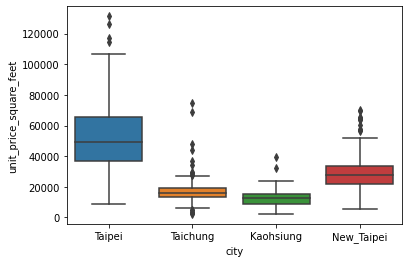

In [157]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區

sns.boxplot(data = data_home_feature, x=data_home_feature['city'],y = data_home_feature['unit_price_square_feet'])

"""
中位數最高為台北
"""

<AxesSubplot:xlabel='room_number', ylabel='total_price'>

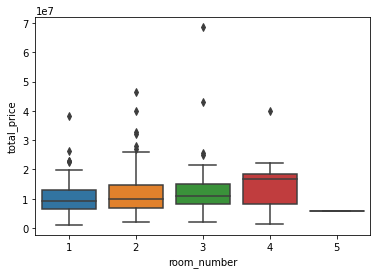

In [160]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
taipei_home =  data_home_feature[ data_home_feature['city']=="Taipei"]
sns.boxplot(data = taipei_home, x=taipei_home['room_number'],y = taipei_home['total_price'])
'''
room_number為4
'''

中位數最大是大安區


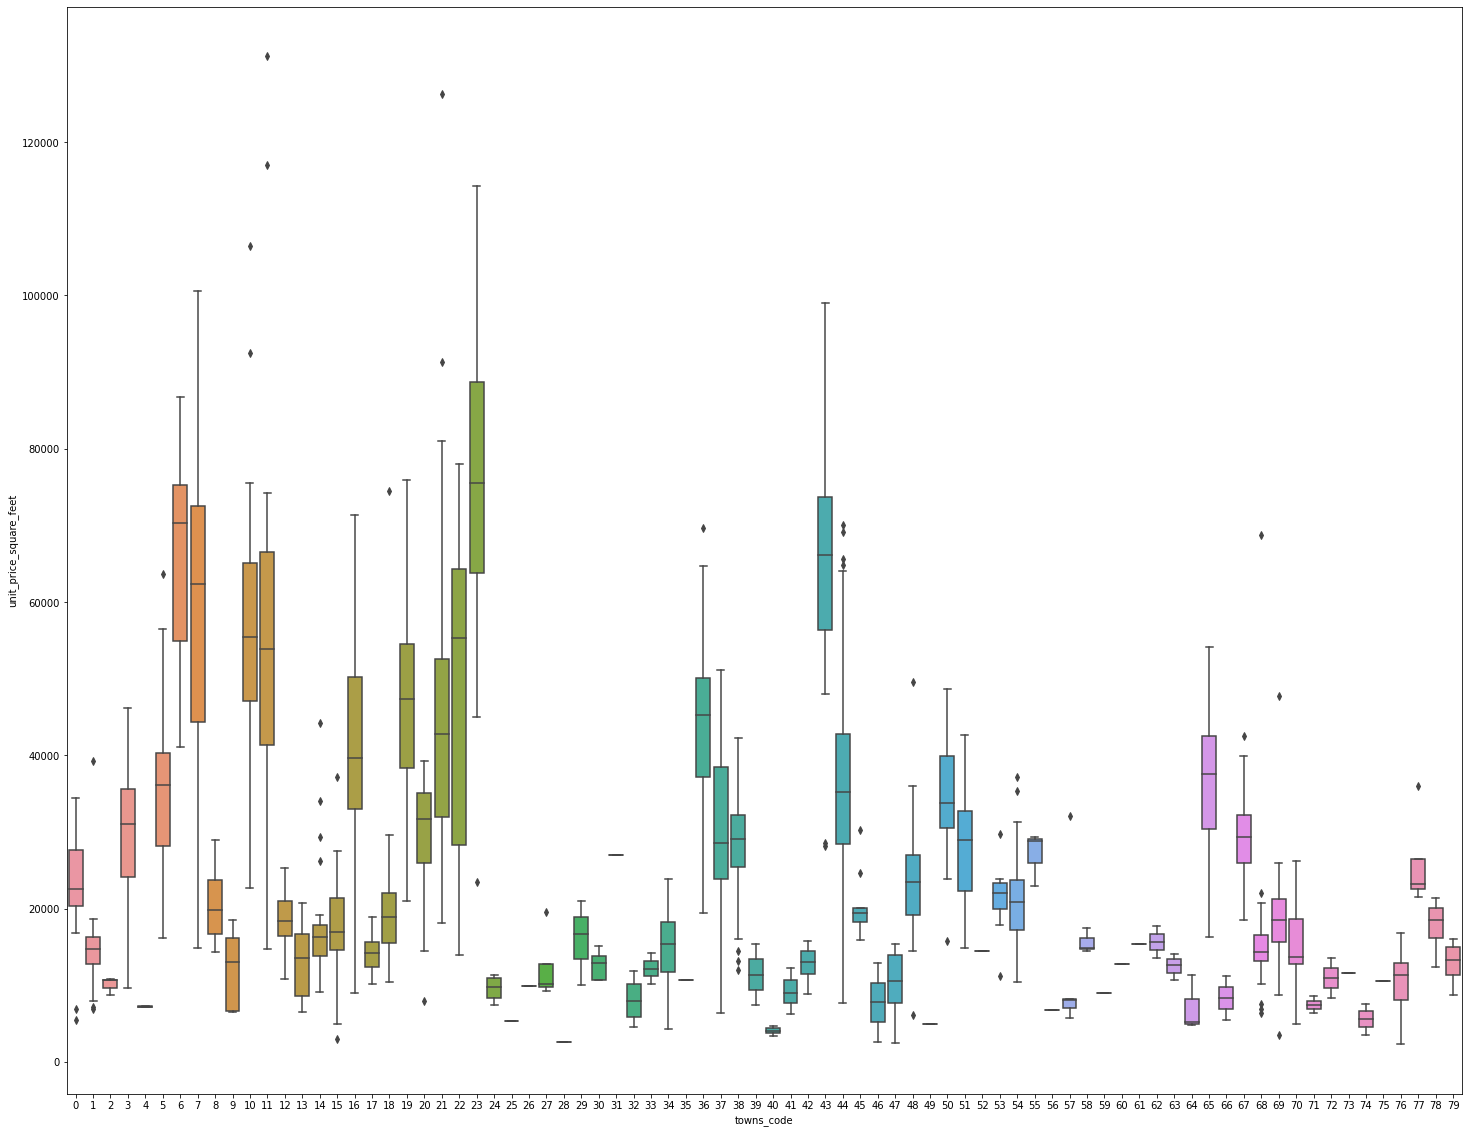

In [233]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
data = data_home_feature.copy()
le = LabelEncoder()
data['towns_code'] = le.fit_transform(data['towns'])

plt.figure(figsize=(25, 20))
sns.boxplot(data = data, x=data['towns_code'],y = data['unit_price_square_feet'])
plt.show
'''
編號為23的地區
'''
data_town = data[data['towns_code']==23]['towns'].reset_index().drop(columns="index").iloc[0][0]
# %s str()將字串輸出
# %d 以10 進位整數方式輸出
print('中位數最大是%s'%(data_town))